![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [126]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [127]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [128]:
# Data preprocessing
print(penguins_df.isna().sum().sort_values())
print(penguins_df.shape)
print(penguins_df.info())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
(332, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


In [129]:
# Preprocessing for feature input inconsistencies (data is clean)
for column in penguins_df.columns:
    print(penguins_df[column].unique())

[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 36.6 38.7 42.5 34.4 46.
 37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2 37.6
 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4 39.
 35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 34.6 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 19.  20.7 18.4 21.5 18.3
 19.2 18.1 17.2 18.9 18.6 17.9 16.7 17.  21.1 20.  18.5 19.1 19.7 16.9
 18.8 17.7 19.5 17.5 16.6 18.2 17

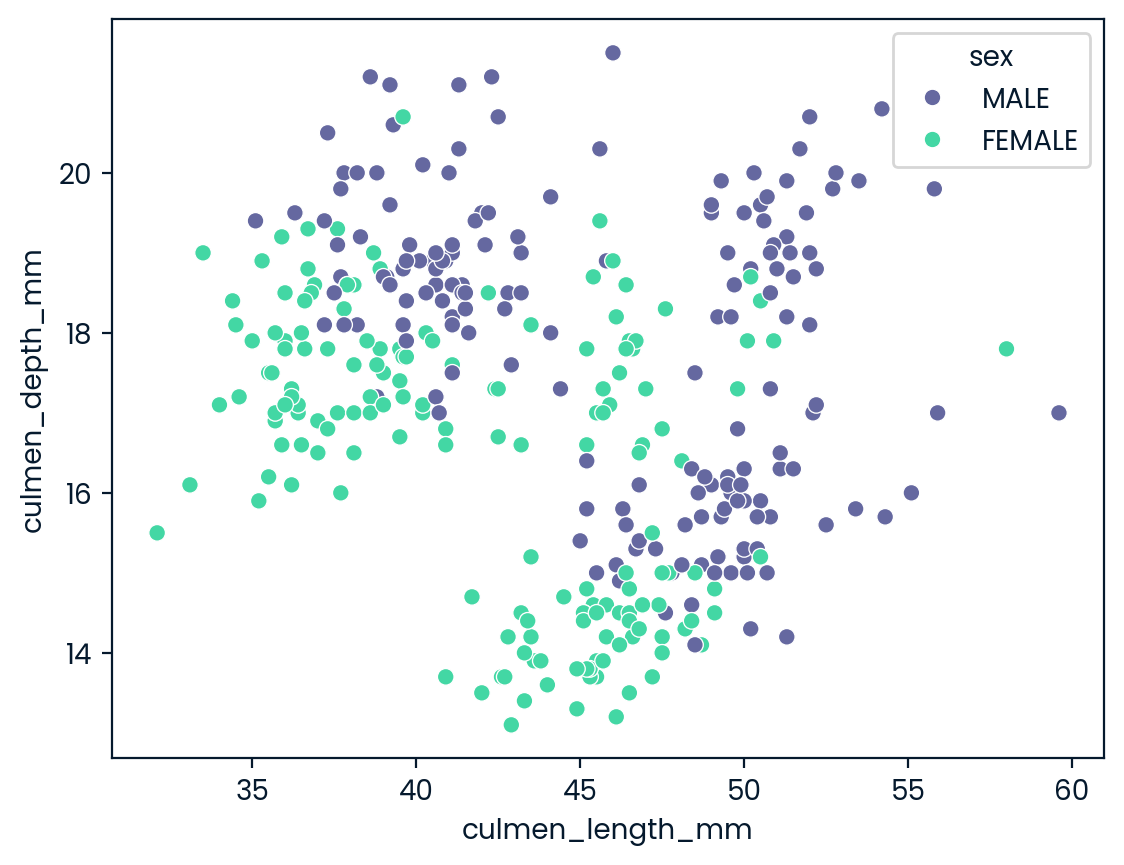

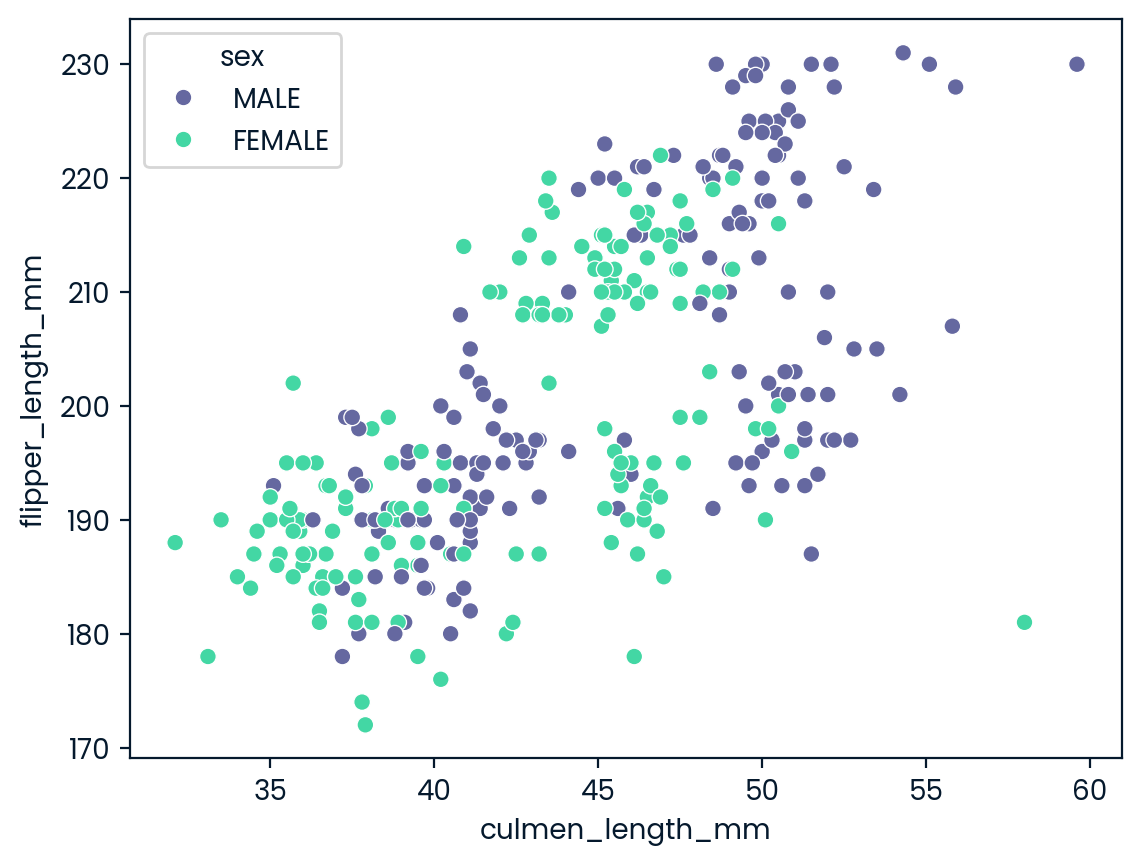

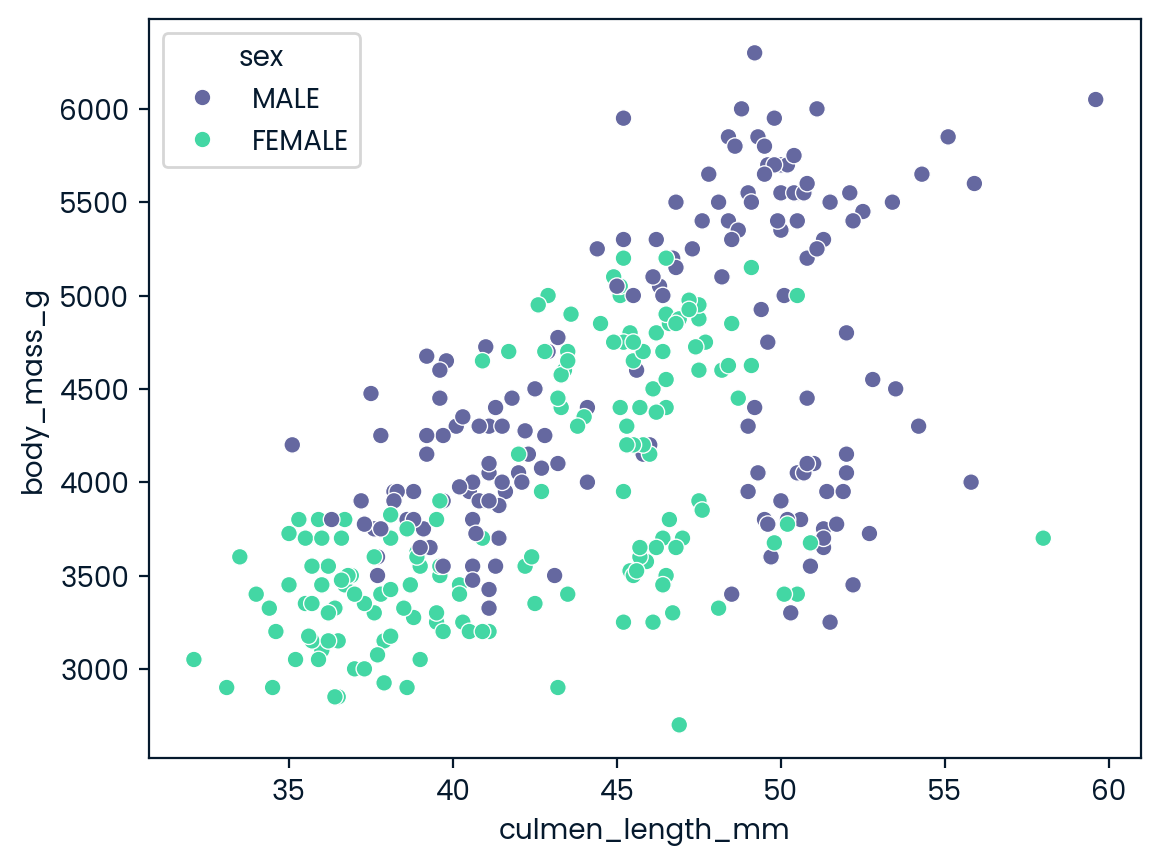

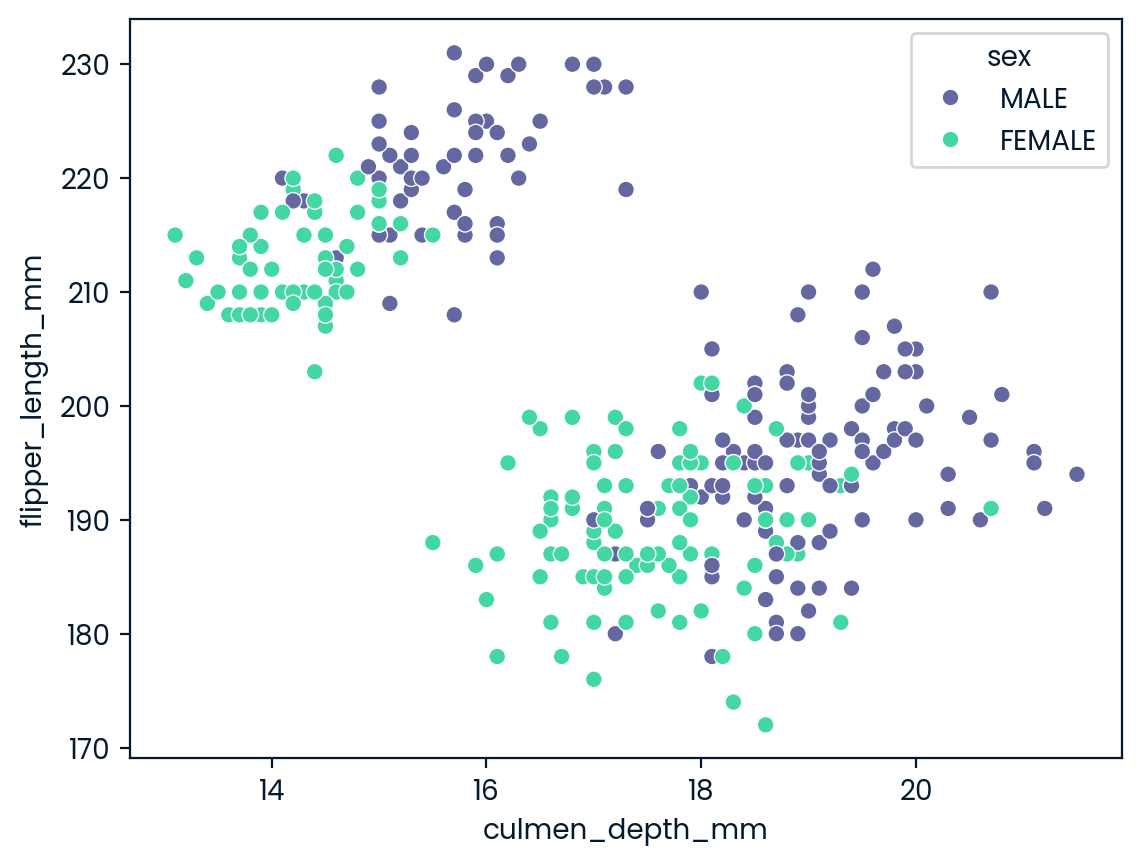

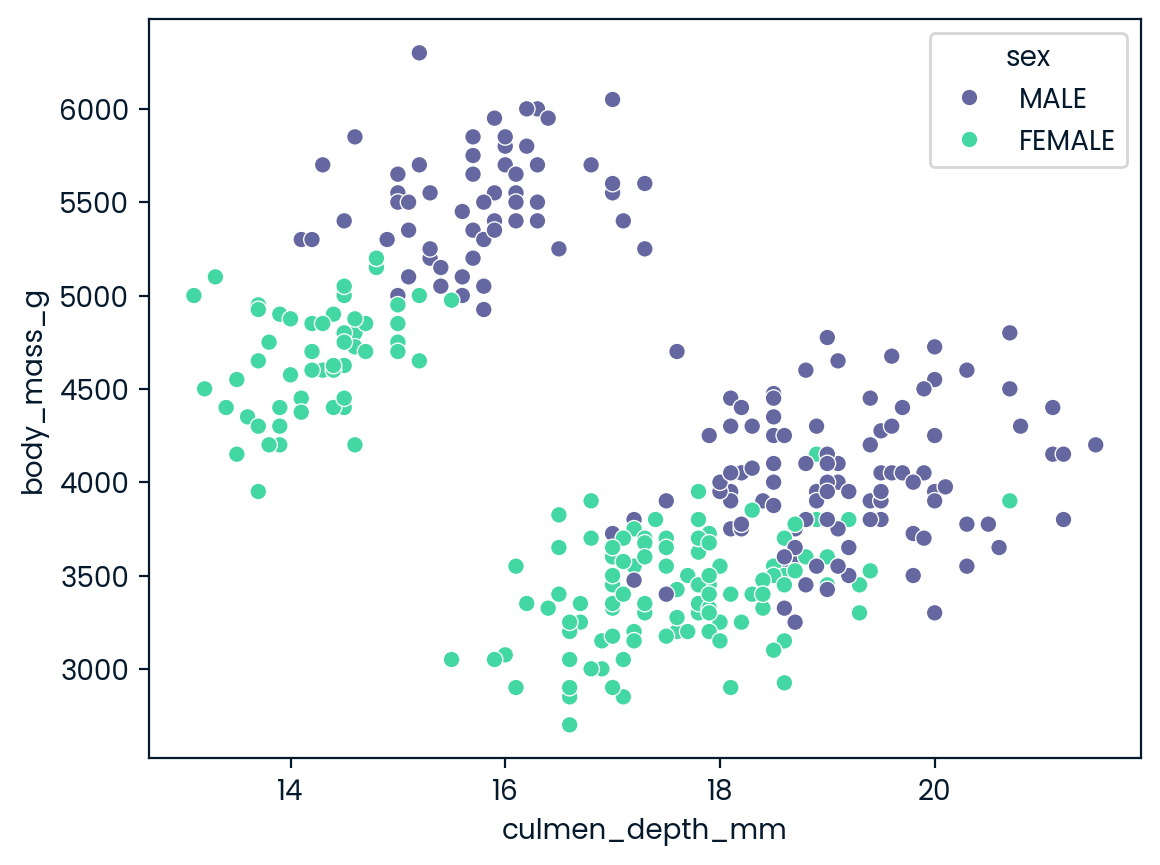

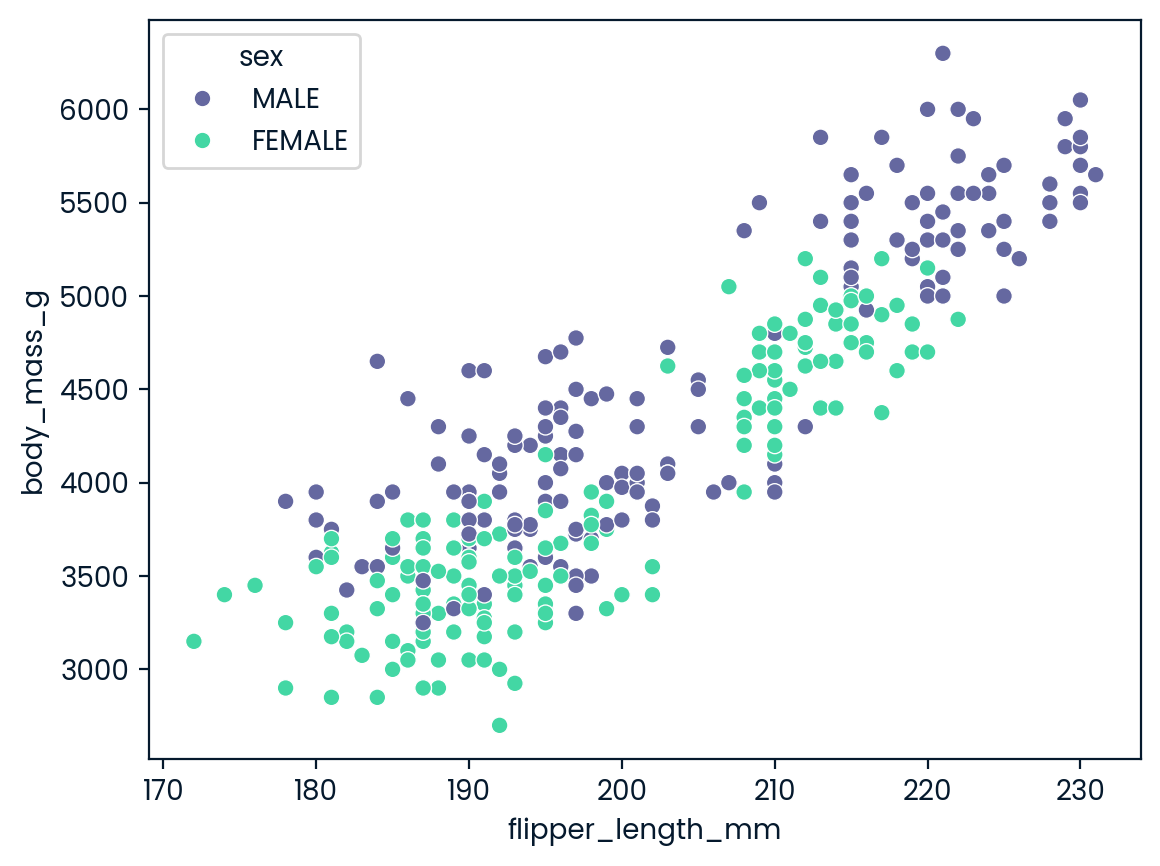

In [130]:
# Display plot for initial comparison and estimate of potential clusters
cols = penguins_df.columns
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x = x_label, y = y_label, data = penguins_df, hue= 'sex')
        plt.show()

In [131]:
# Binary classification for categorical features (One-Hot Encoding)
X_cat = penguins_df[penguins_df.columns[-1]].values.reshape(-1,1)
encoder = OneHotEncoder(drop = 'first', sparse = False)
X_cat_enc =  encoder.fit_transform(X_cat)  
# X_cat_enc_SAME =  (penguins_df['sex'] == 'MALE').astype(int).values.reshape(-1,1)

# Scaling the numeric features
X_num = penguins_df[penguins_df.columns[:-1]].values
scaler = StandardScaler()
X_num_scale = scaler.fit_transform(X_num)

# Combining back to the samples
penguins_samples = np.hstack((X_num_scale, X_cat_enc))

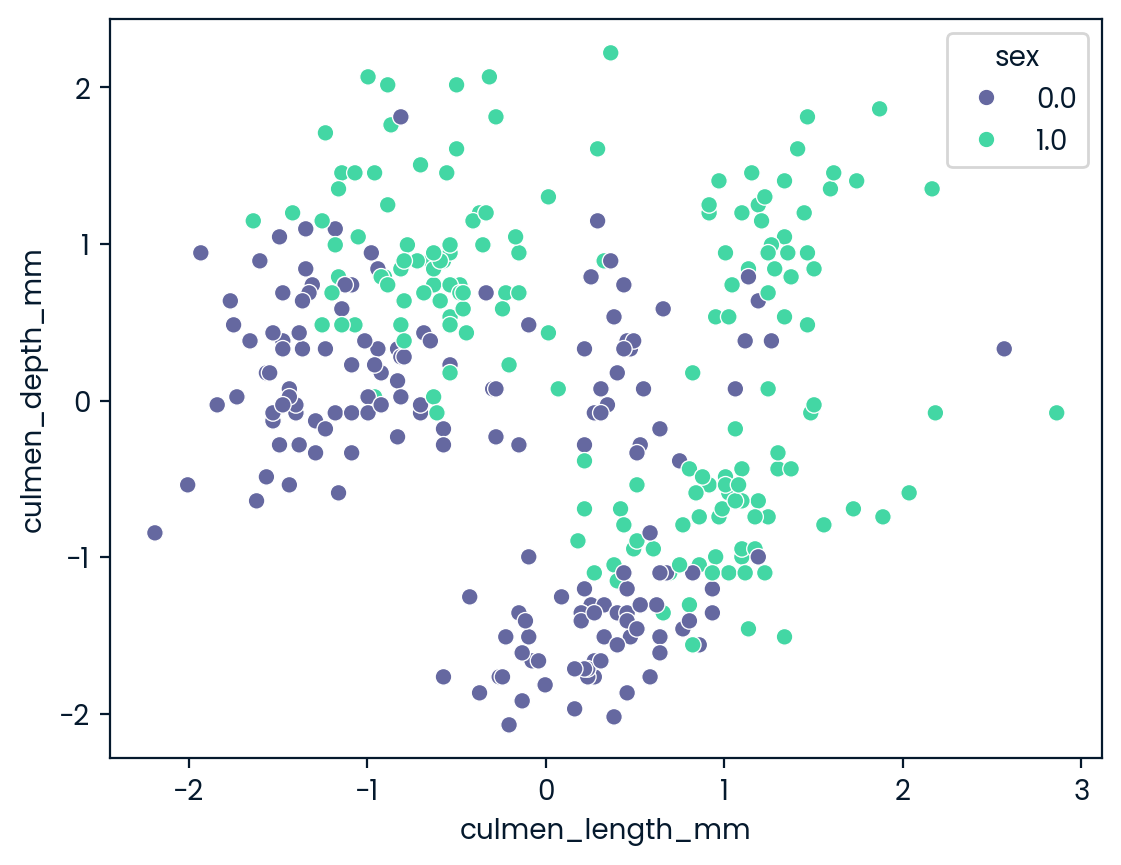

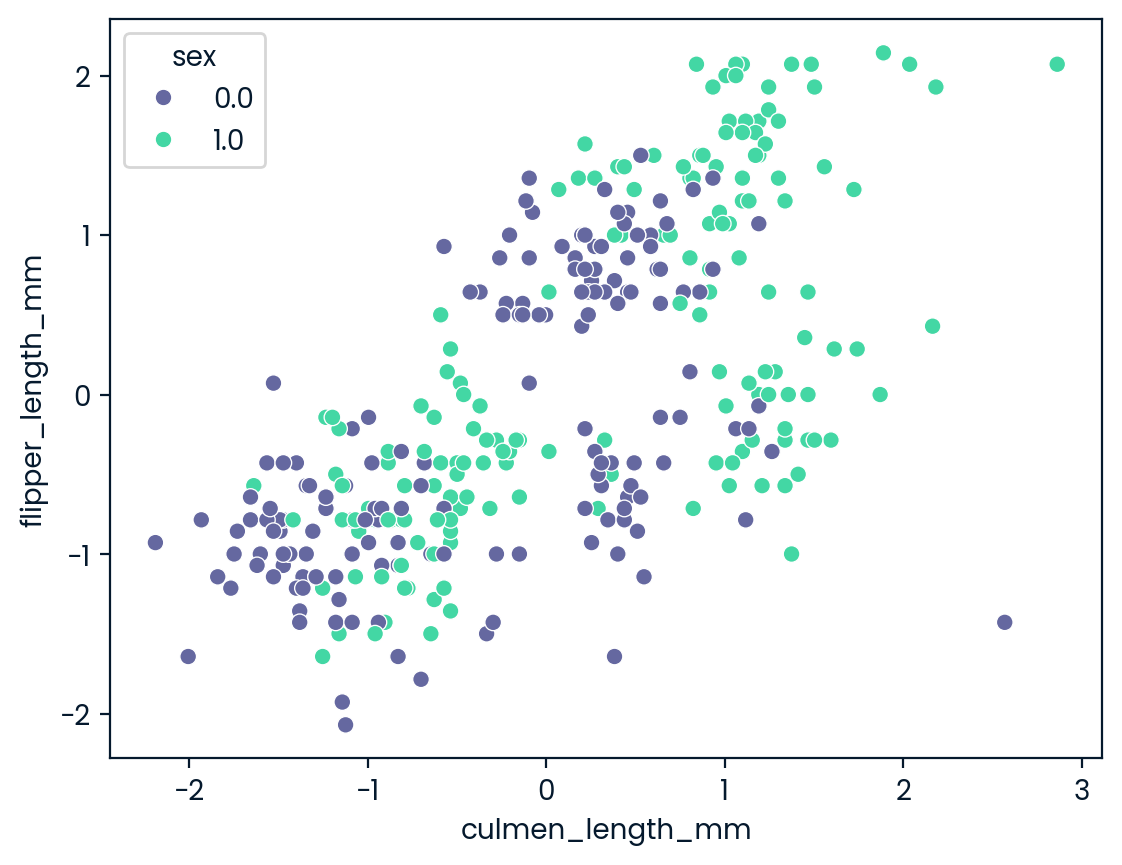

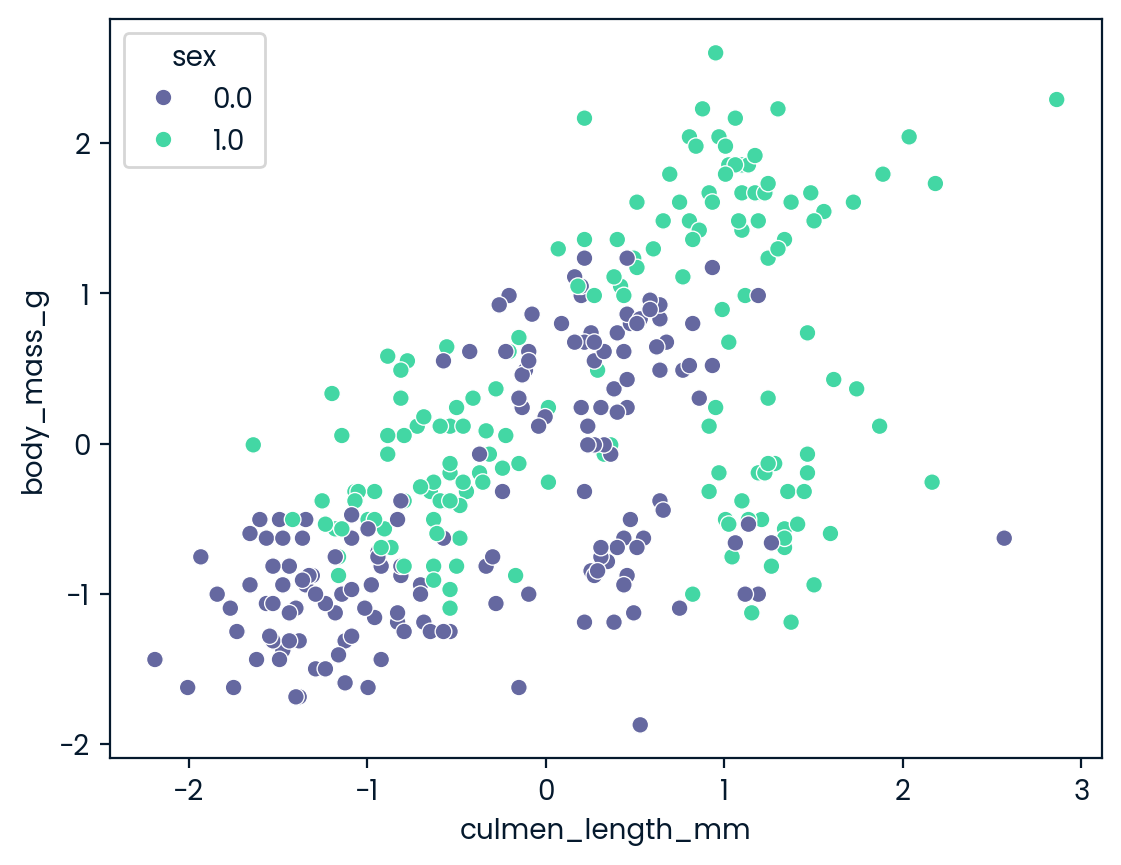

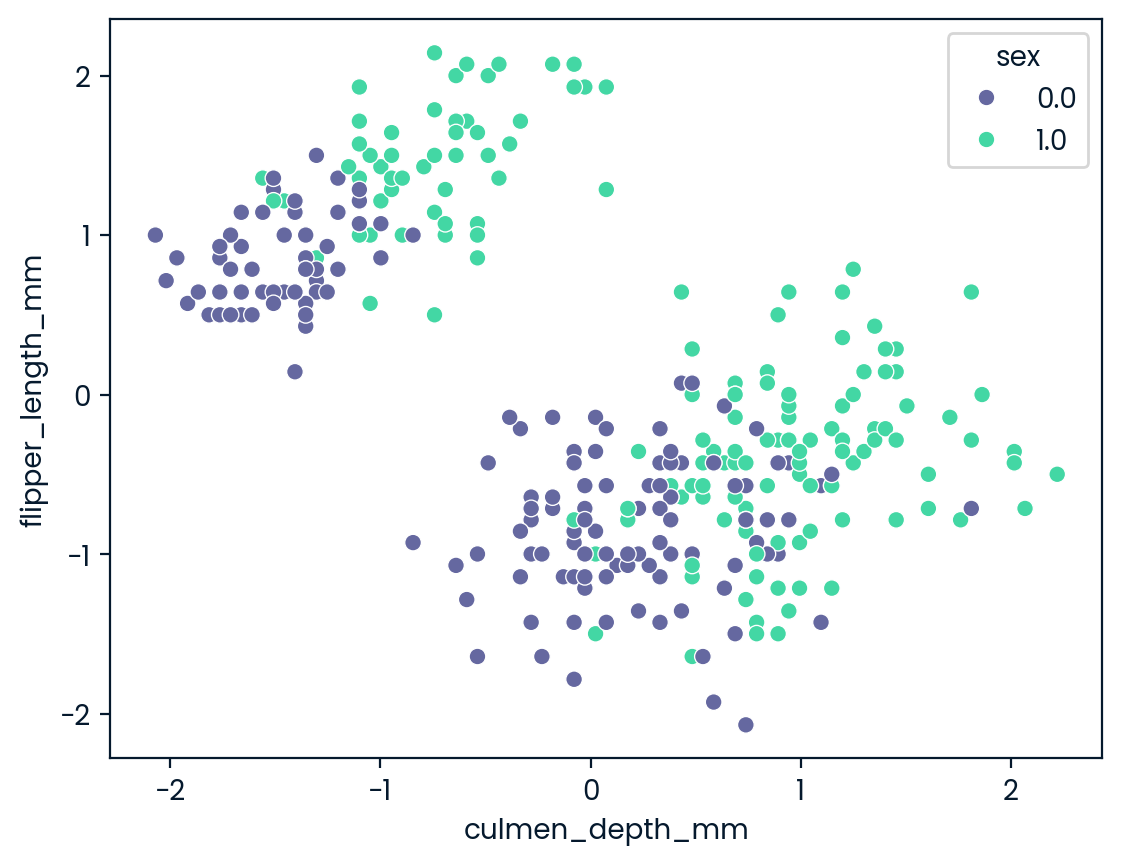

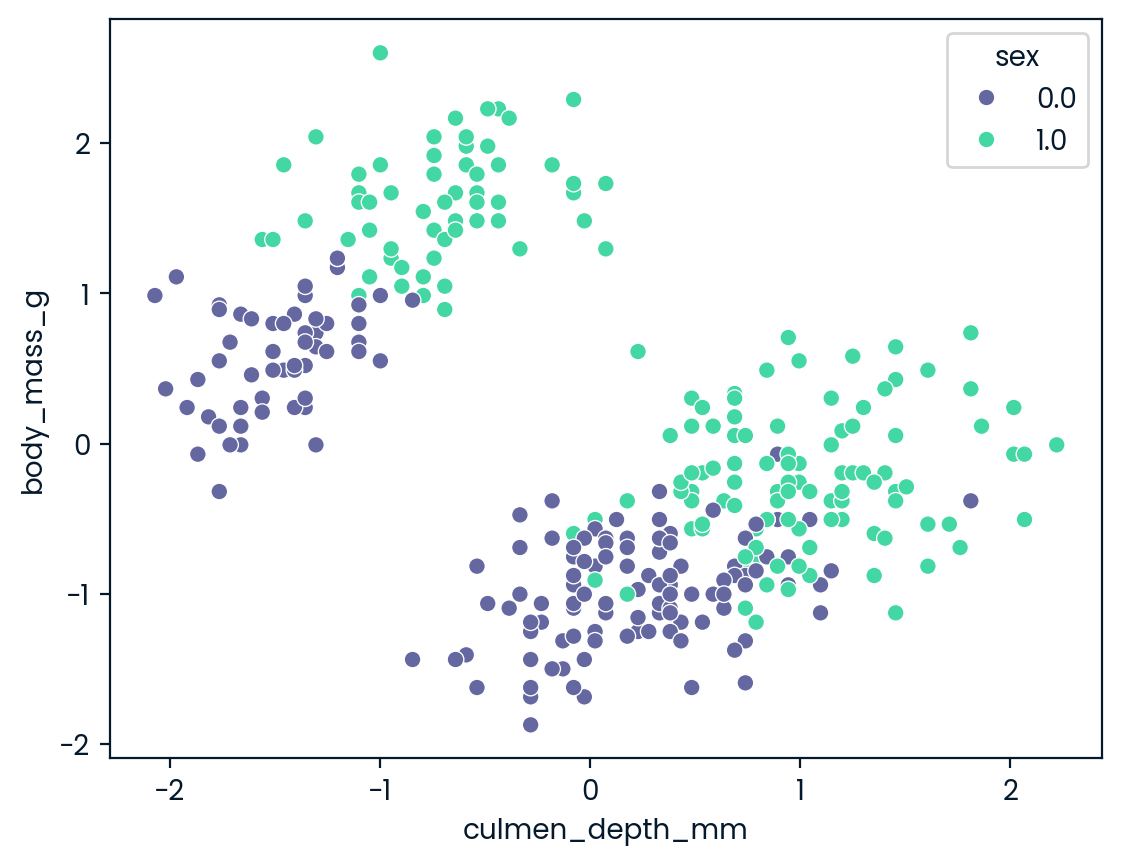

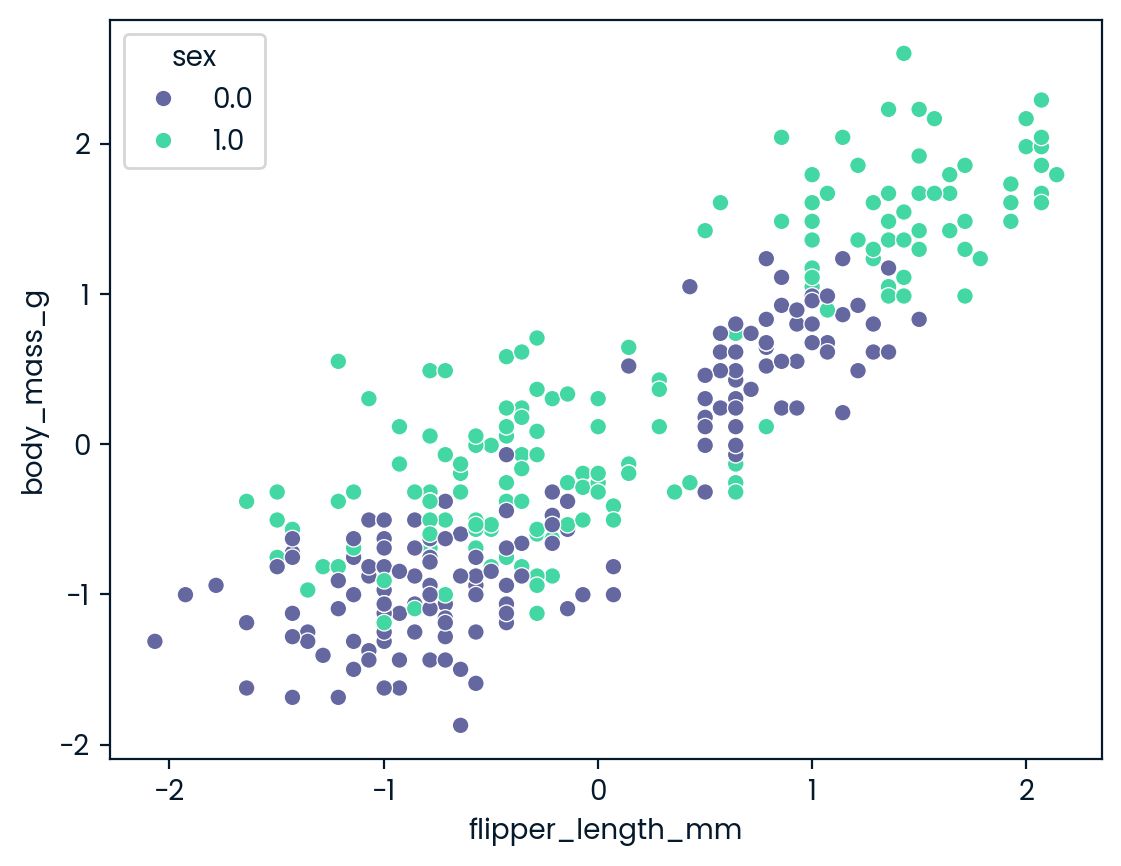

In [132]:
# Replot the processed features
penguins_new = pd.DataFrame(penguins_samples, columns = cols)

for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_new_label = cols[i]
        y_new_label = cols[j]
        sns.scatterplot(x = x_new_label, y = y_new_label, data = penguins_new, hue= 'sex')
        plt.show()

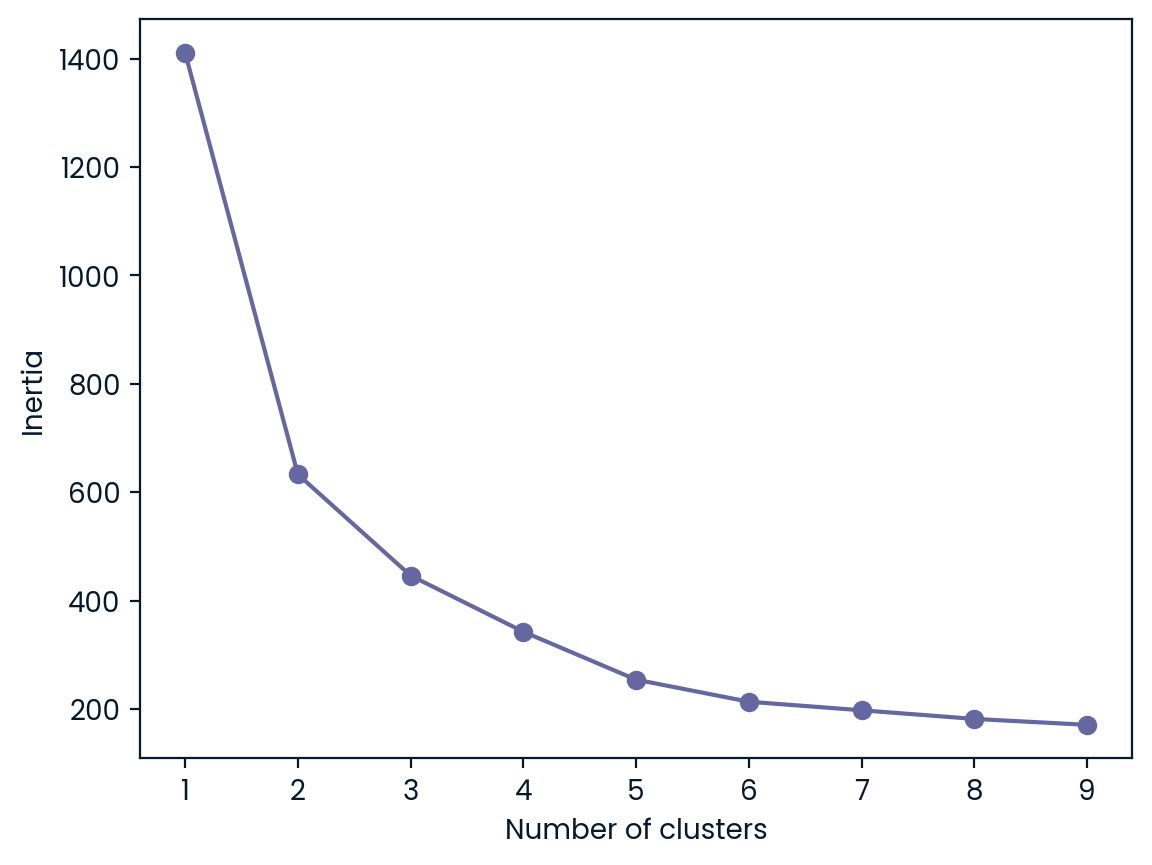

The optimal value of clusters seems to be *k =4*


In [133]:
# Optimal number of clusters for k-means clustering - Elbow analysis
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, random_state = 69)
    model.fit(penguins_samples)
    inertias.append(model.inertia_)
    
# Plot inertials 
plt.plot(ks, inertias,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

print(f'The optimal value of clusters seems to be *k =4*')

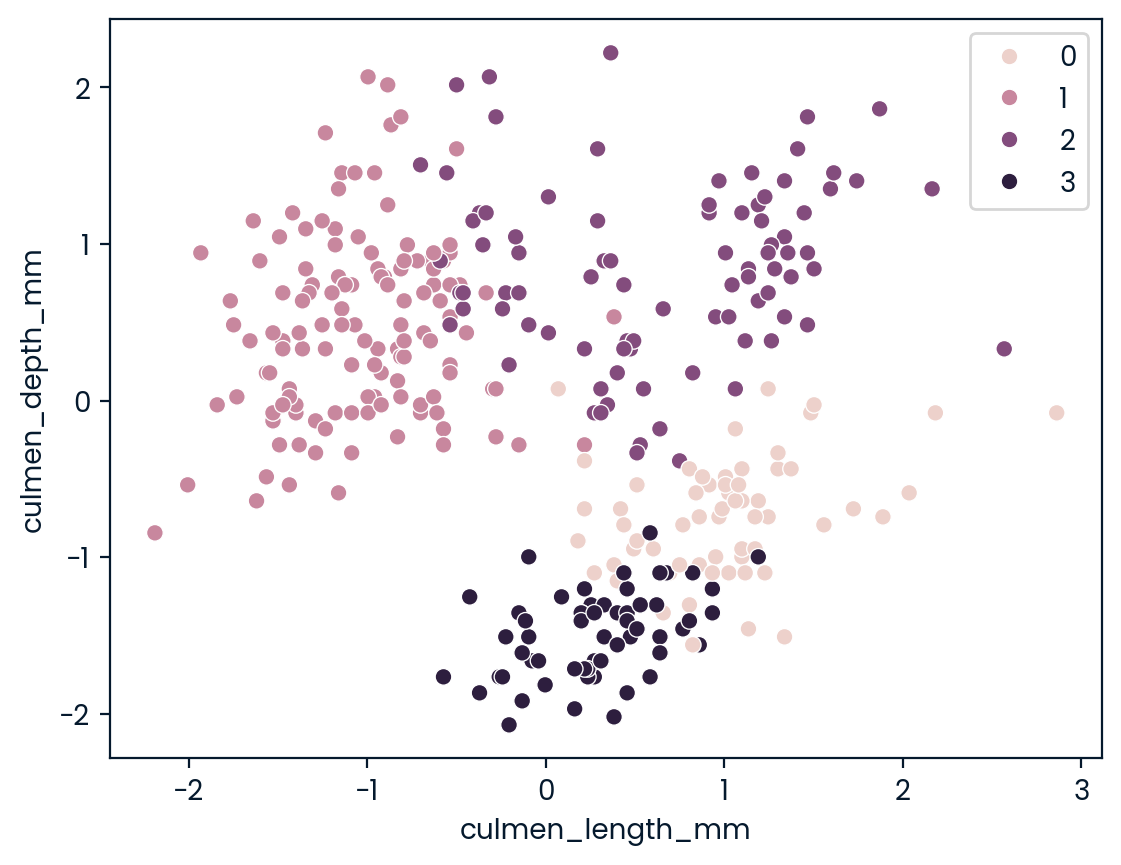

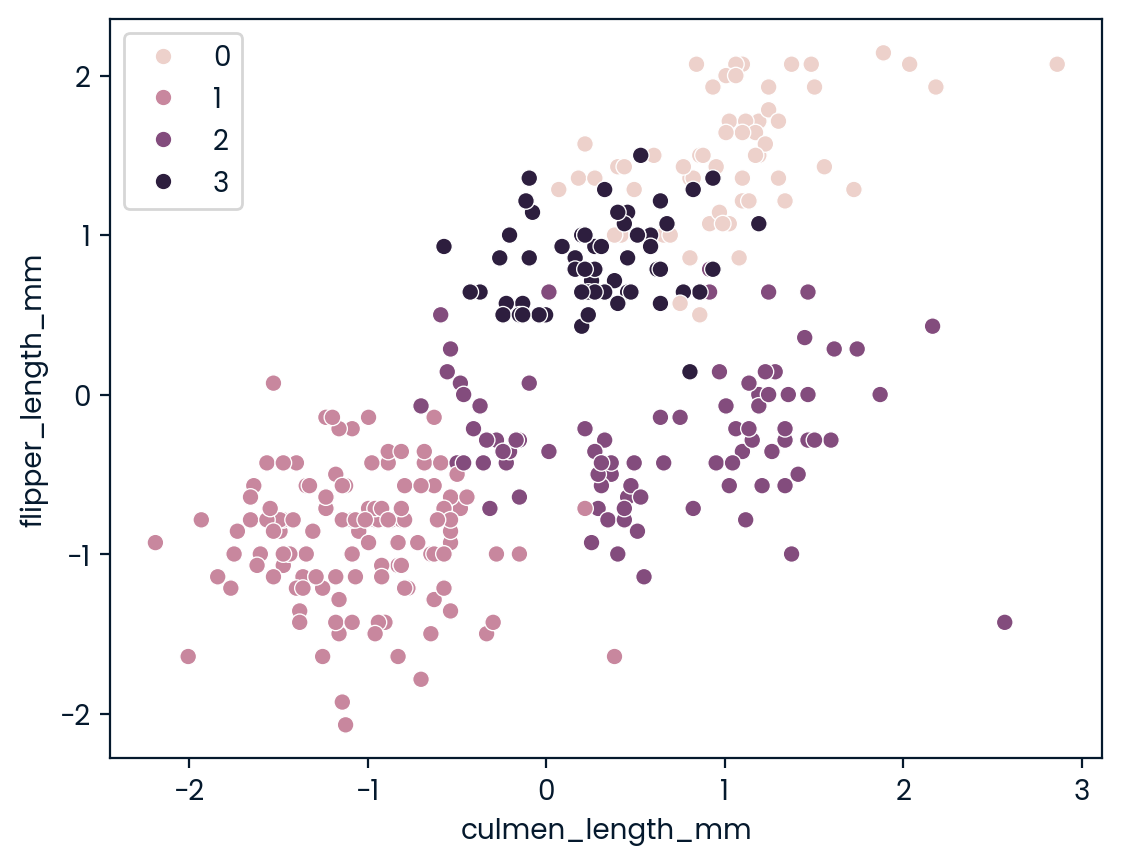

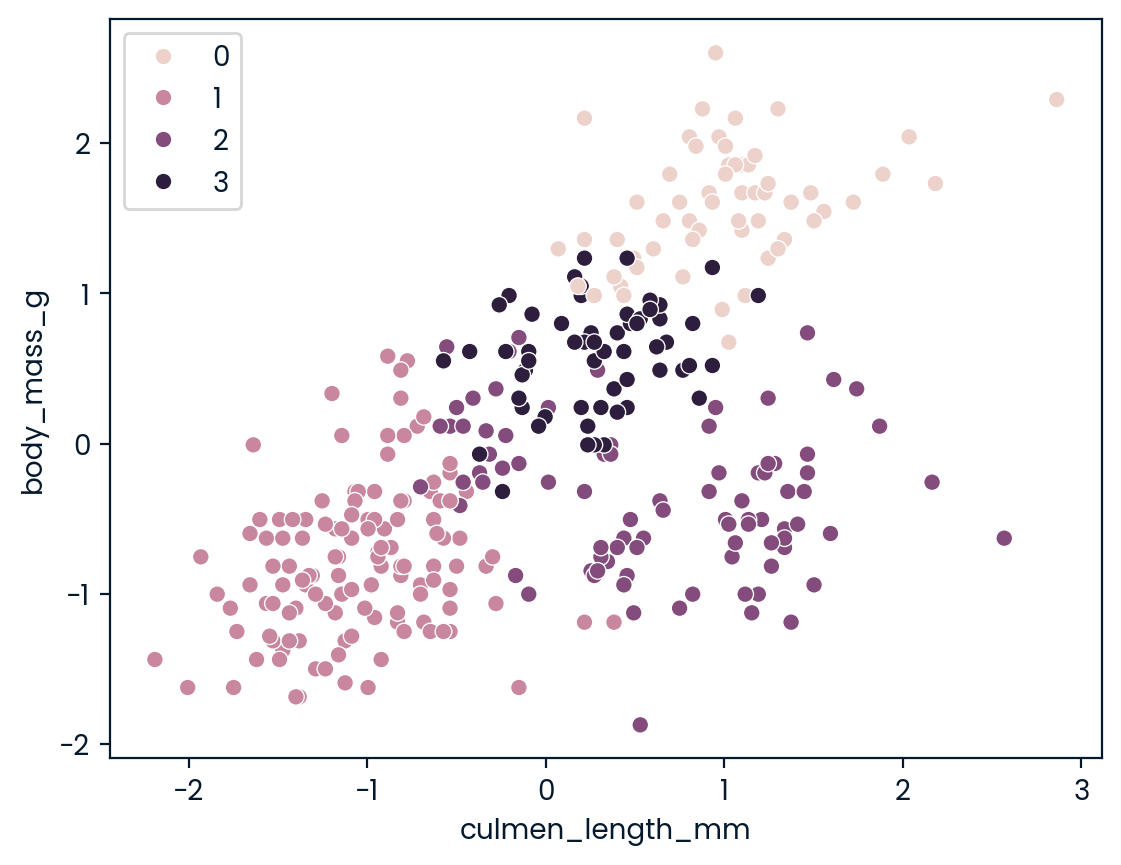

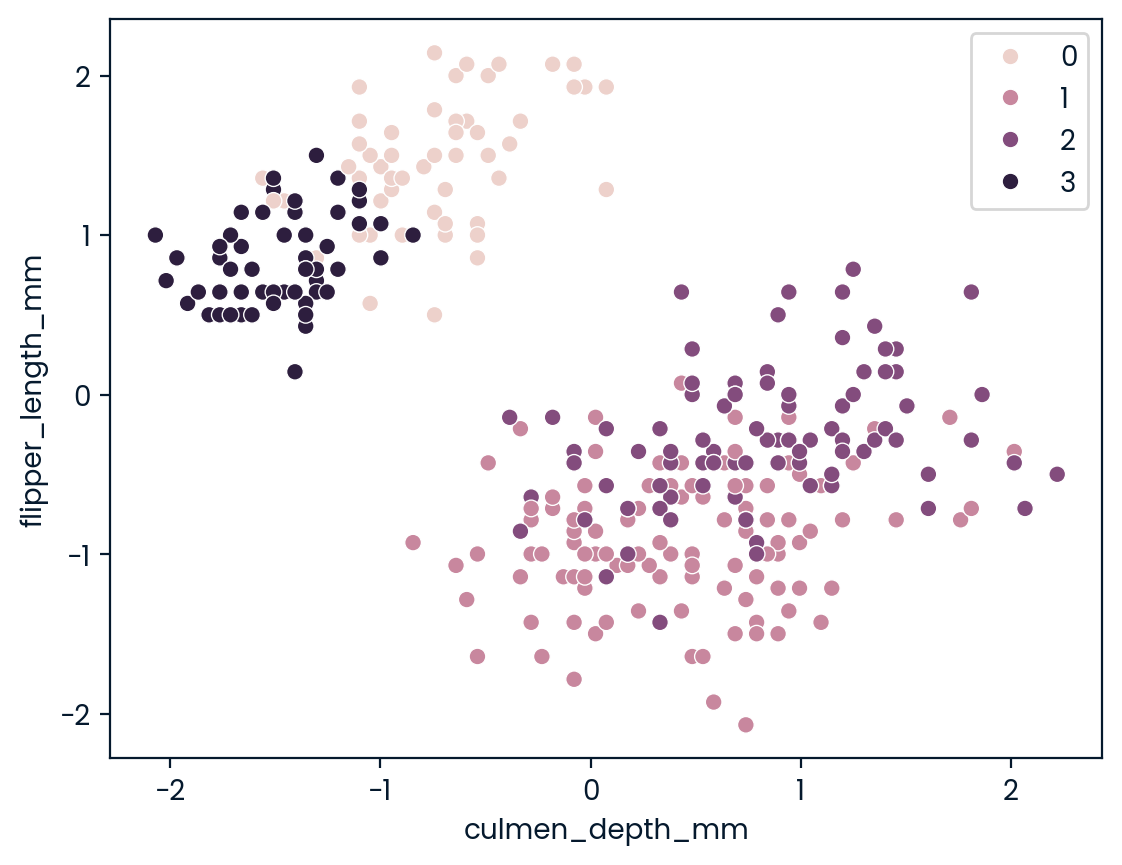

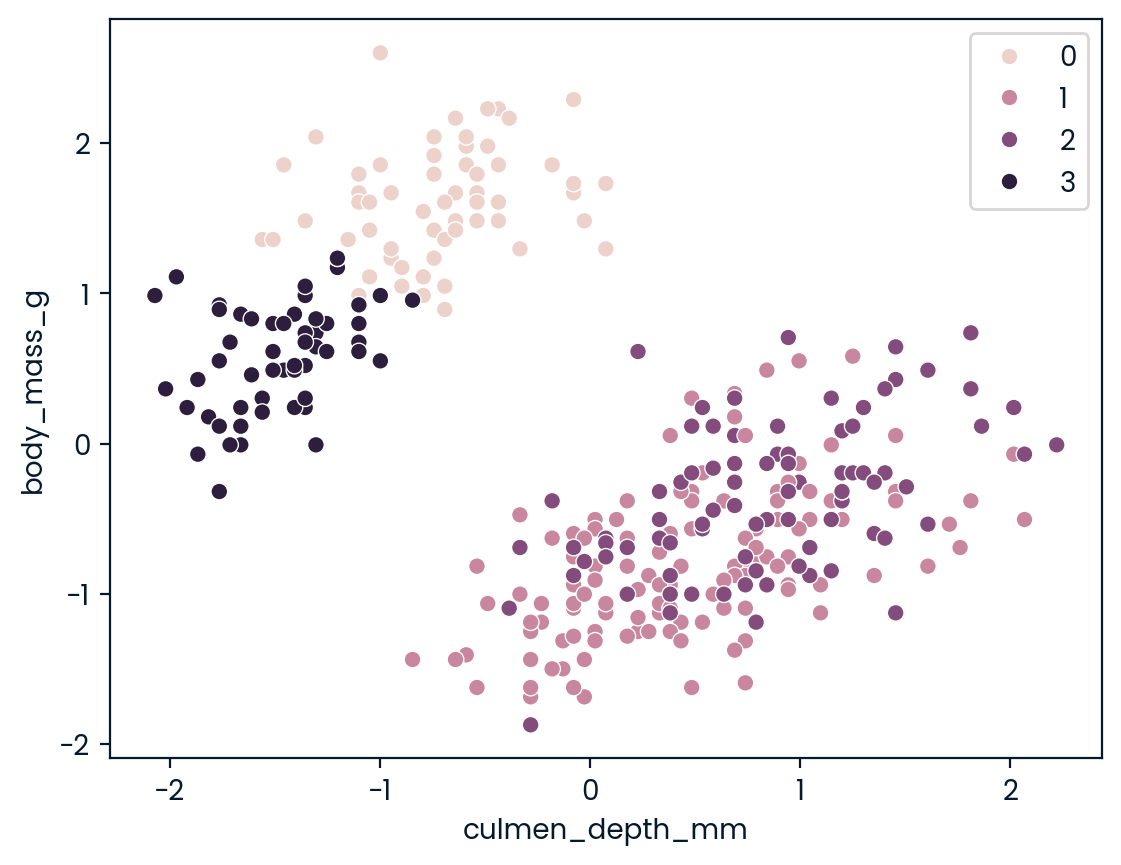

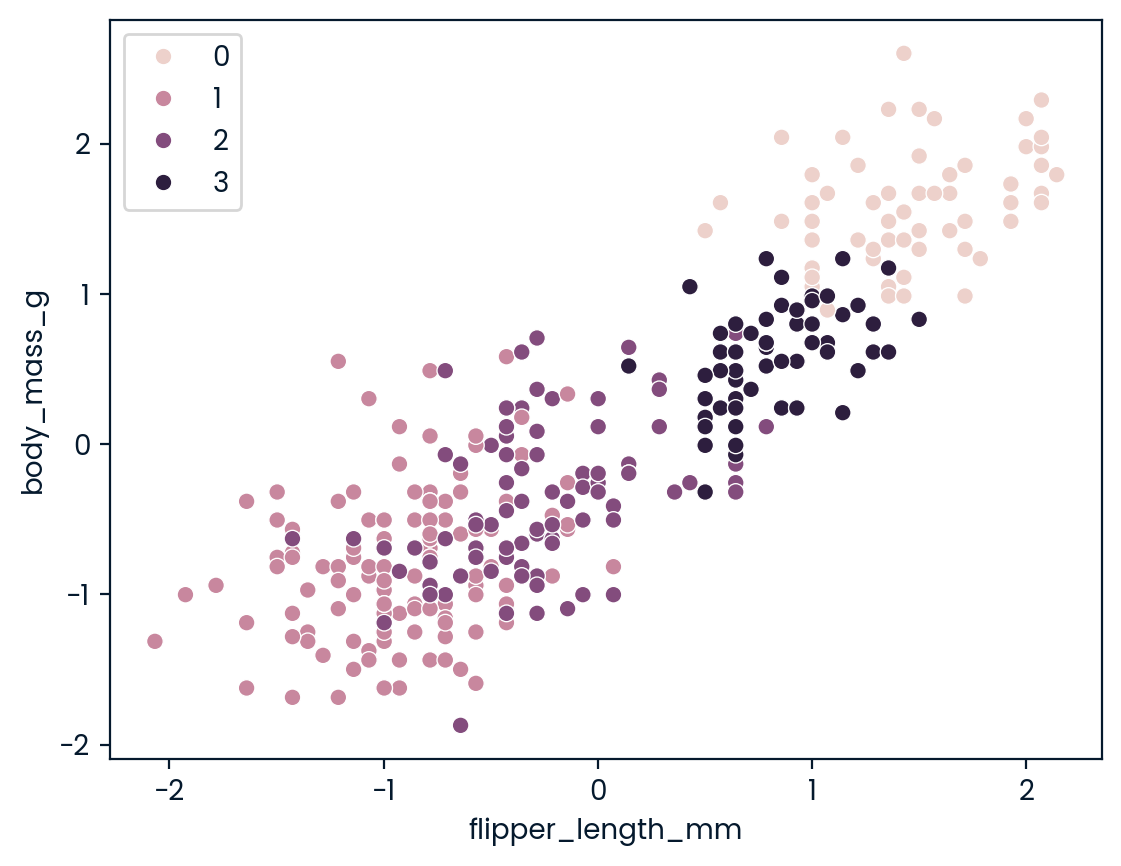

In [134]:
# k-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 4, random_state = 69)
kmeans.fit(penguins_samples)
labels = kmeans.predict(penguin_samples)
# equivalently: c = kmeans.labels_

# Visualizing clusters for each numeric feature
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        xlabel = cols[i]
        ylabel = cols[j]
        sns.scatterplot(x = xlabel, y = ylabel, data = penguins_new, hue= labels)
        plt.show()

In [135]:
# Statistical Dataframe for each cluster
numeric_columns = penguins_df.columns[:-1].tolist()

# Arranging dataframe for mean of clusters for scaled numeric features
penguins_new['label'] = labels 
stat_penguins_scale = penguins_new.groupby('label')[numeric_columns].mean()


# Arranging dataframe for mean of clusters for unscaled numeric features
penguins_df['label'] = labels 
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,49.473770,15.718033,221.540984,5484.836066
1,38.356693,18.066929,188.244094,3571.259843
2,47.477907,18.787209,197.279070,3918.604651
3,45.563793,14.237931,212.706897,4679.741379
